In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import operator
import os
import re

%matplotlib inline

In [0]:
!pip install pydotplus

In [0]:
!pip install graphviz 
!apt-get install graphviz 

In [154]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [155]:
user_table = pd.read_csv("/content/drive/My Drive/DS2/Week_8/user_table_8.csv")
user_table.head()

user_id         city country    lat    long
0   510335      Peabody     USA  42.53  -70.97
1    89568         Reno     USA  39.54 -119.82
2   434134       Rialto     USA  34.11 -117.39
3   289769  Carson City     USA  39.15 -119.74
4   939586      Chicago     USA  41.84  -87.68

In [156]:
print(user_table.shape)

(275616, 5)


In [157]:
test_table = pd.read_csv("/content/drive/My Drive/DS2/Week_8/test_results.csv")
test_table.head()

user_id            timestamp          source  device operative_system  \
0   604839  2015-05-08 03:38:34    ads_facebook  mobile              iOS   
1   624057  2015-05-10 21:08:46      seo-google  mobile          android   
2   317970  2015-04-04 15:01:23        ads-bing  mobile          android   
3   685636  2015-05-07 07:26:01  direct_traffic  mobile              iOS   
4   820854  2015-05-24 11:04:40    ads_facebook     web              mac   

   test  price  converted  
0     0     39          0  
1     0     39          0  
2     0     39          0  
3     1     59          0  
4     0     39          0

In [158]:
print(test_table.shape)

(316800, 8)


In [159]:
merge_df = test_table.merge(user_table,on="user_id")
print(merge_df.shape)

(275616, 12)


In [160]:
merge_df.head()

user_id            timestamp          source  device operative_system  \
0   604839  2015-05-08 03:38:34    ads_facebook  mobile              iOS   
1   624057  2015-05-10 21:08:46      seo-google  mobile          android   
2   317970  2015-04-04 15:01:23        ads-bing  mobile          android   
3   685636  2015-05-07 07:26:01  direct_traffic  mobile              iOS   
4   820854  2015-05-24 11:04:40    ads_facebook     web              mac   

   test  price  converted          city country    lat   long  
0     0     39          0       Buffalo     USA  42.89 -78.86  
1     0     39          0     Lakeville     USA  44.68 -93.24  
2     0     39          0         Parma     USA  41.38 -81.73  
3     1     59          0  Fayetteville     USA  35.07 -78.90  
4     0     39          0       Fishers     USA  39.95 -86.02

In [0]:
merge_df['timestamp'] = merge_df['timestamp'].apply(lambda x: re.sub('60', '00', x))
merge_df['timestamp']=pd.to_datetime(merge_df['timestamp'],format='%Y-%m-%d %H:%M:%S')

In [162]:
merge_df['hour']=merge_df['timestamp'].apply(lambda x:x.hour)
merge_df['day_of_week']=merge_df['timestamp'].apply(lambda x:x.weekday())
merge_df['month']=merge_df['timestamp'].apply(lambda x:x.month)
merge_df['year']=merge_df['timestamp'].apply(lambda x:x.year)
merge_df['date']=merge_df['timestamp'].apply(lambda x:x.date())
merge_df['day_of_year'] = merge_df['timestamp'].apply(lambda x: x.strftime("%j"))
merge_df.head()

user_id           timestamp          source  device operative_system  test  \
0   604839 2015-05-08 03:38:34    ads_facebook  mobile              iOS     0   
1   624057 2015-05-10 21:08:46      seo-google  mobile          android     0   
2   317970 2015-04-04 15:01:23        ads-bing  mobile          android     0   
3   685636 2015-05-07 07:26:01  direct_traffic  mobile              iOS     1   
4   820854 2015-05-24 11:04:40    ads_facebook     web              mac     0   

   price  converted          city country    lat   long  hour  day_of_week  \
0     39          0       Buffalo     USA  42.89 -78.86     3            4   
1     39          0     Lakeville     USA  44.68 -93.24    21            6   
2     39          0         Parma     USA  41.38 -81.73    15            5   
3     59          0  Fayetteville     USA  35.07 -78.90     7            3   
4     39          0       Fishers     USA  39.95 -86.02    11            6   

   month  year        date day_of_year  
0      5  2015  2015-05-08         128  
1      5  2015  2015-05-10         130  
2      4  2015  2015-04-04         094  
3      5  2015  2015-05-07         127  
4      5  2015  2015-05-24         144

In [163]:
merge_df.describe()

user_id           test          price      converted  \
count  275616.000000  275616.000000  275616.000000  275616.000000   
mean   499245.801521       0.359878      46.201324       0.018210   
std    288533.458944       0.479965       9.600403       0.133711   
min         3.000000       0.000000      39.000000       0.000000   
25%    249544.500000       0.000000      39.000000       0.000000   
50%    498861.000000       0.000000      39.000000       0.000000   
75%    748856.500000       1.000000      59.000000       0.000000   
max    999999.000000       1.000000      59.000000       1.000000   

                 lat           long           hour    day_of_week  \
count  275616.000000  275616.000000  275616.000000  275616.000000   
mean       37.111680     -93.981772      11.885689       3.921793   
std         5.209627      18.086486       5.055906       1.678295   
min        19.700000    -157.800000       0.000000       0.000000   
25%        33.660000    -112.200000       9.000000       3.000000   
50%        37.740000     -88.930000      12.000000       4.000000   
75%        40.700000     -78.910000      15.000000       5.000000   
max        61.180000      30.310000      23.000000       6.000000   

               month      year  
count  275616.000000  275616.0  
mean        4.042164    2015.0  
std         0.822336       0.0  
min         3.000000    2015.0  
25%         3.000000    2015.0  
50%         4.000000    2015.0  
75%         5.000000    2015.0  
max         5.000000    2015.0

# Should the company sell its software for 39 or 59?

In [0]:
tested = merge_df[merge_df["test"]==1]
non_tested = merge_df[merge_df["test"]==0]

In [165]:
print(tested['converted'].mean())
print(non_tested['converted'].mean())

0.015425253054805016
0.019775772553109482


In [166]:
from scipy import stats
stats.ttest_ind(tested['converted'], non_tested['converted'])

Ttest_indResult(statistic=-8.19951105004515, pvalue=2.423875853533498e-16)

In [167]:
#revenue in the non_tested group $39
revenue_non_tested = 39*user_table.shape[0]*non_tested['converted'].mean()

#revenue in the tested group $59
revenue_tested = 59*test_table.shape[0]*tested['converted'].mean()
print('total revenue with 39 dollars:')
print(revenue_non_tested)
print()
print('total revenue with 59 dollars:')
print(revenue_tested)
print()
print('Total increase:')
print((revenue_tested/revenue_non_tested - 1)*100)

total revenue with 39 dollars:
212570.2537919151

total revenue with 59 dollars:
288316.4898979715

Total increase:
35.63350692529368


Therefore, the price 59 dollars will bring higher revenue than the 39 dollars

#Exploratory Analysis

## Device & conversion rate

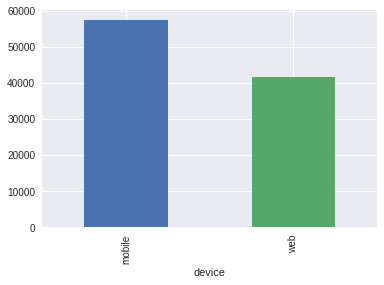

Percentage of mobile users: 0.5788603460095979


count      mean       std  min  25%  50%  75%  max
device test                                                      
mobile 1     57416.0  0.016232  0.126369  0.0  0.0  0.0  0.0  1.0
web    1     41772.0  0.014316  0.118791  0.0  0.0  0.0  0.0  1.0

In [168]:
tested.groupby(['device'])['user_id'].count().plot(kind='bar')
plt.show()
print('Percentage of mobile users:',tested[tested['device']=='mobile'].shape[0]/tested.shape[0])
tested.groupby(['device','test'])['converted'].describe()

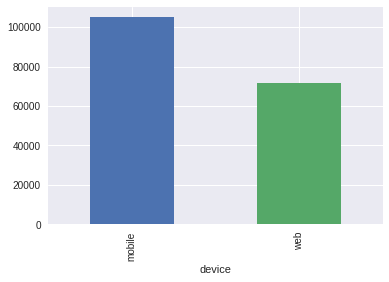

Percentage of mobile users: 0.5946051647130841


count      mean       std  min  25%  50%  75%  max
device test                                                       
mobile 0     104905.0  0.019618  0.138683  0.0  0.0  0.0  0.0  1.0
web    0      71523.0  0.020008  0.140027  0.0  0.0  0.0  0.0  1.0

In [169]:
non_tested.groupby(['device'])['user_id'].count().plot(kind='bar')
plt.show()
print('Percentage of mobile users:',non_tested[non_tested['device']=='mobile'].shape[0]/non_tested.shape[0])
non_tested.groupby(['device','test'])['converted'].describe()

We can see that the conversion rate in non-tested users (39 dollars) is higher in mobile, while conversion rate in tested user (59 dollars) is higher in web

## Source and conversion rate

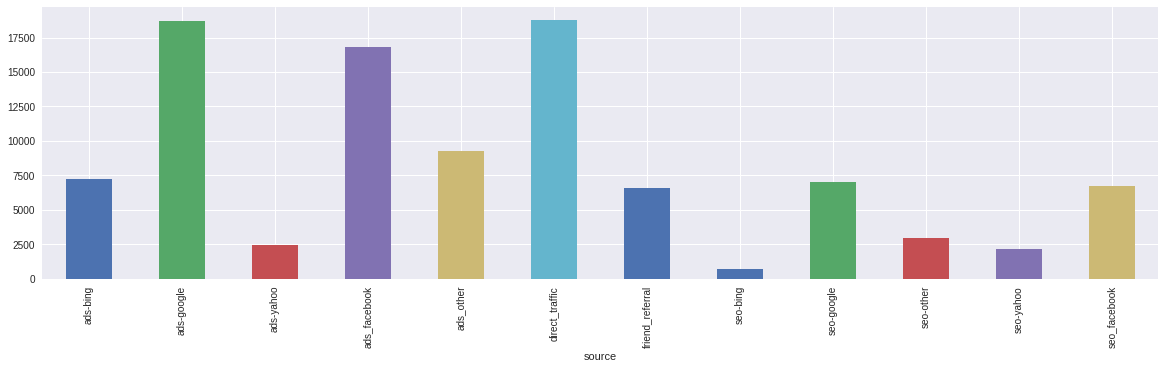

count      mean       std  min  25%  50%  75%  max
source          test                                                      
ads-bing        1      7200.0  0.009722  0.098128  0.0  0.0  0.0  0.0  1.0
ads-google      1     18690.0  0.019315  0.137634  0.0  0.0  0.0  0.0  1.0
ads-yahoo       1      2411.0  0.012443  0.110875  0.0  0.0  0.0  0.0  1.0
ads_facebook    1     16784.0  0.016980  0.129202  0.0  0.0  0.0  0.0  1.0
ads_other       1      9236.0  0.013101  0.113713  0.0  0.0  0.0  0.0  1.0
direct_traffic  1     18799.0  0.009788  0.098450  0.0  0.0  0.0  0.0  1.0
friend_referral 1      6583.0  0.031900  0.175748  0.0  0.0  0.0  0.0  1.0
seo-bing        1       715.0  0.011189  0.105257  0.0  0.0  0.0  0.0  1.0
seo-google      1      7008.0  0.015839  0.124861  0.0  0.0  0.0  0.0  1.0
seo-other       1      2925.0  0.012308  0.110274  0.0  0.0  0.0  0.0  1.0
seo-yahoo       1      2130.0  0.010798  0.103376  0.0  0.0  0.0  0.0  1.0
seo_facebook    1      6707.0  0.013568  0.115697  0.0  0.0  0.0  0.0  1.0

In [170]:
plt.figure(figsize =(20,5))
tested.groupby(['source'])['user_id'].count().plot(kind='bar')
plt.show()
tested.groupby(['source','test'])['converted'].describe()

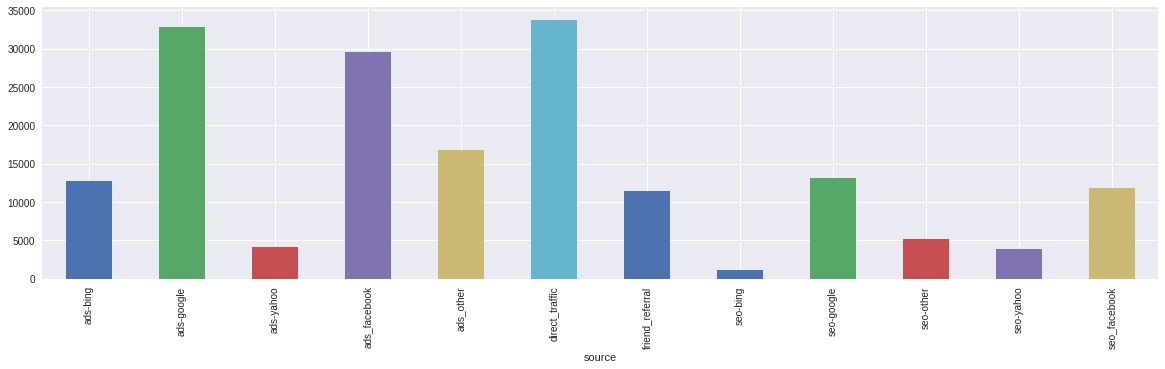

count      mean       std  min  25%  50%  75%  max
source          test                                                      
ads-bing        0     12687.0  0.013242  0.114314  0.0  0.0  0.0  0.0  1.0
ads-google      0     32886.0  0.022532  0.148409  0.0  0.0  0.0  0.0  1.0
ads-yahoo       0      4165.0  0.015846  0.124896  0.0  0.0  0.0  0.0  1.0
ads_facebook    0     29581.0  0.023596  0.151790  0.0  0.0  0.0  0.0  1.0
ads_other       0     16848.0  0.015076  0.121859  0.0  0.0  0.0  0.0  1.0
direct_traffic  0     33795.0  0.013464  0.115250  0.0  0.0  0.0  0.0  1.0
friend_referral 0     11428.0  0.041390  0.199198  0.0  0.0  0.0  0.0  1.0
seo-bing        0      1159.0  0.027610  0.163923  0.0  0.0  0.0  0.0  1.0
seo-google      0     13149.0  0.017644  0.131658  0.0  0.0  0.0  0.0  1.0
seo-other       0      5133.0  0.017923  0.132685  0.0  0.0  0.0  0.0  1.0
seo-yahoo       0      3831.0  0.019838  0.139462  0.0  0.0  0.0  0.0  1.0
seo_facebook    0     11766.0  0.017168  0.129903  0.0  0.0  0.0  0.0  1.0

In [171]:
plt.figure(figsize =(20,5))
non_tested.groupby(['source'])['user_id'].count().plot(kind='bar')
plt.show()
non_tested.groupby(['source','test'])['converted'].describe()

For both tested and non-tested users, friend referral yields highest conversion rates

## Operative system & conversion rate

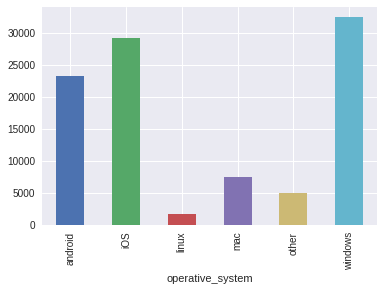

count      mean       std  min  25%  50%  75%  max
operative_system test                                                      
android          1     23297.0  0.012748  0.112189  0.0  0.0  0.0  0.0  1.0
iOS              1     29221.0  0.019986  0.139953  0.0  0.0  0.0  0.0  1.0
linux            1      1702.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
mac              1      7535.0  0.020305  0.141052  0.0  0.0  0.0  0.0  1.0
other            1      4940.0  0.010324  0.101091  0.0  0.0  0.0  0.0  1.0
windows          1     32493.0  0.013695  0.116224  0.0  0.0  0.0  0.0  1.0

In [172]:
tested.groupby(['operative_system'])['user_id'].count().plot(kind='bar')
plt.show()
tested.groupby(['operative_system','test'])['converted'].describe()

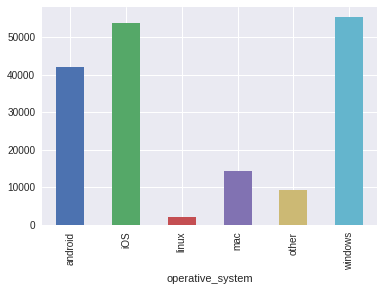

count      mean       std  min  25%  50%  75%  max
operative_system test                                                      
android          0     42008.0  0.015997  0.125465  0.0  0.0  0.0  0.0  1.0
iOS              0     53761.0  0.023493  0.151464  0.0  0.0  0.0  0.0  1.0
linux            0      1932.0  0.016046  0.125683  0.0  0.0  0.0  0.0  1.0
mac              0     14296.0  0.026441  0.160448  0.0  0.0  0.0  0.0  1.0
other            0      9203.0  0.013365  0.114839  0.0  0.0  0.0  0.0  1.0
windows          0     55228.0  0.018505  0.134770  0.0  0.0  0.0  0.0  1.0

In [173]:
non_tested.groupby(['operative_system'])['user_id'].count().plot(kind='bar')
plt.show()
non_tested.groupby(['operative_system','test'])['converted'].describe()

In can be concluded that Windows has the most users in both tested and non tested group

## Time vs conversion rate

No handles with labels found to put in legend.


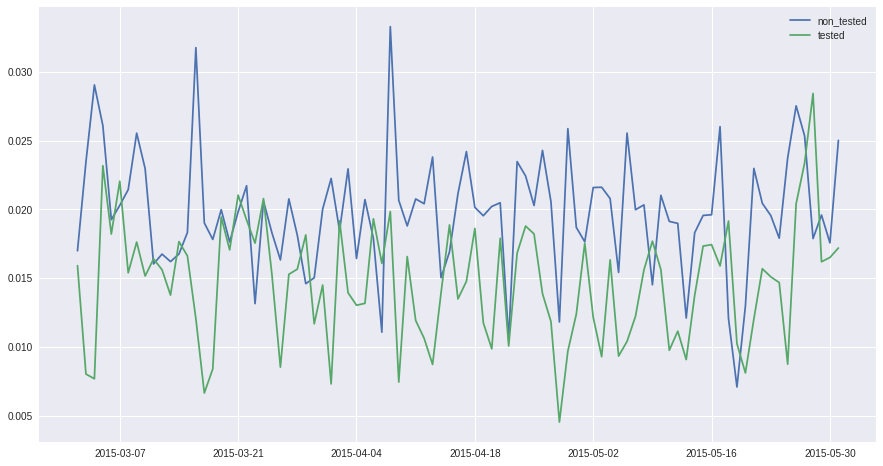

In [174]:
df1 = tested[['converted','date']]
tested_mean=df1.groupby('date').mean()

df2 = non_tested[['converted','date']]
non_tested_mean=df2.groupby('date').mean()

figure = plt.figure(figsize=(15, 8))
plt.legend(loc='best')
plt.plot(non_tested_mean['converted'],'-', label="non_tested")#control

plt.plot(tested_mean['converted'],'-', label="tested")
plt.legend(loc='best')#test

## By city

In [175]:
city_test = tested.groupby(['city'])['converted'].mean()
city_test.nlargest(5)

city
North Atlanta    0.250000
Lehigh Acres     0.210526
Chapel Hill      0.200000
Blue Springs     0.166667
Findlay          0.166667
Name: converted, dtype: float64

In [176]:
city_control = non_tested.groupby(['city'])['converted'].mean()
city_control.nlargest(5)

city
Bonita Springs              0.250000
Catonsville                 0.250000
Saint Charles               0.200000
Parkway-South Sacramento    0.181818
Ceres                       0.142857
Name: converted, dtype: float64

  # Decision Tree

##tested group - multiple features

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [0]:
features = ['source', 'device', 'operative_system', 'hour', 'day_of_week', 'month',]

target = ['converted']

In [0]:
X_test = pd.get_dummies(tested[features])
y_test = tested[target]

In [180]:
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(X_test.values,y_test.values)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

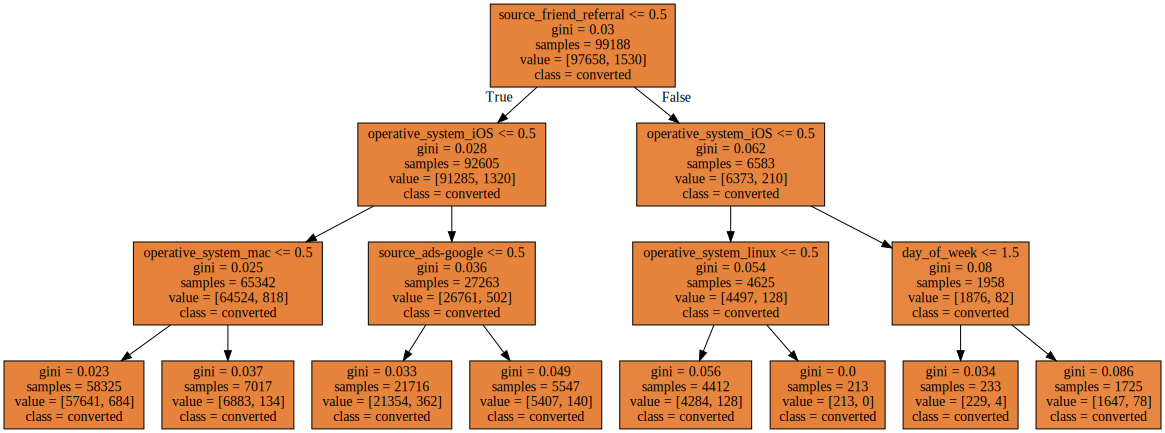

In [181]:
graph = Source(export_graphviz(dtree, out_file=None, feature_names=list(X_test.columns), class_names=target, filled = True))
display(SVG(graph.pipe(format='svg')))

Here is some conclusion based on the decision tree for tested users:

*   Friend referral can increase the conversion rate from 1.68% (no friend referral) to 3.79% 

**Friend referral**

*   For  iOS users , conversion rate is 5.39% if the website is viewed after 3.30pm, compared to 4.07% (before 3.30pm)
*   Linux users have zero conversion rate

**For other sources than friend referral:***
*  


*   google ads converts more people (2.52% - if no, 1.67%)
*   Mac users have higher conversion rate 2%, if no- 1.1%







## non_tested group - multiple features

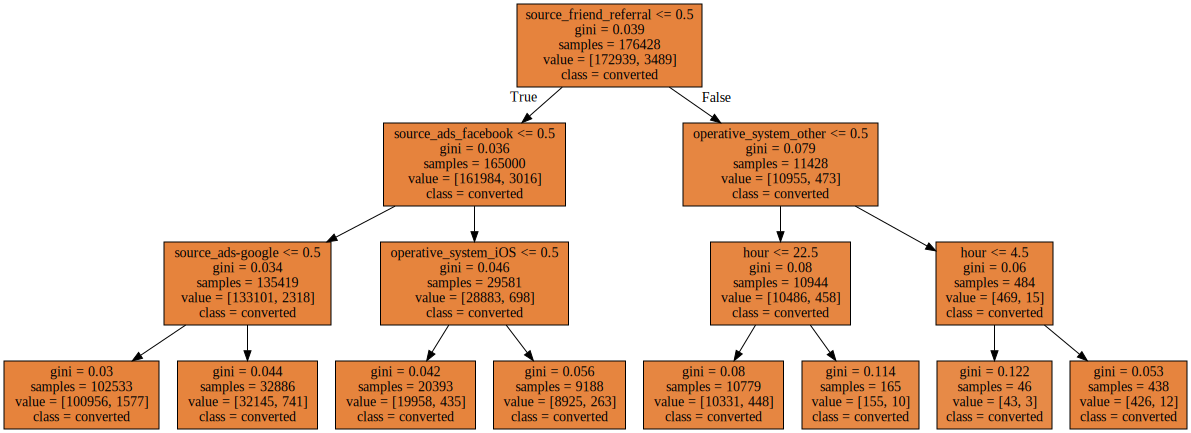

In [182]:
X_control = pd.get_dummies(non_tested[features])
y_control = non_tested[target]
dtree_2 = DecisionTreeClassifier(max_depth=3)
dtree_2.fit(X_control.values,y_control.values)
graph = Source(export_graphviz(dtree_2, out_file=None, feature_names=list(X_test.columns), class_names=target, filled = True))
display(SVG(graph.pipe(format='svg')))


Here is some conclusion based on the decision tree for non_tested users:

*   Friend referral can increase the conversion rate from 1.83% (no friend referral) to 4.14% 








##tested group - day of year 

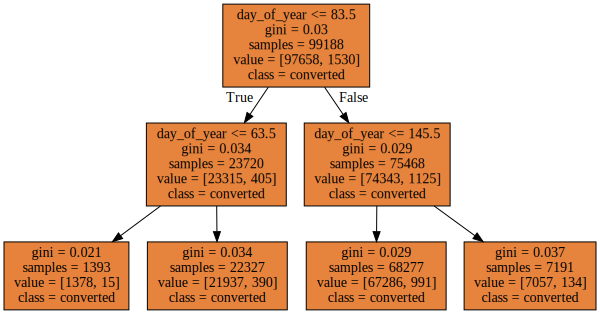

In [183]:
features = ['day_of_year']

target = ['converted']
X_test = tested[features].astype(int)
y_test = tested[target]
dtree_3 = DecisionTreeClassifier(max_depth=2)
dtree_3.fit(X_test.values,y_test.values)

graph = Source(export_graphviz(dtree_3, out_file=None, feature_names=list(X_test.columns), class_names=target, filled = True))
display(SVG(graph.pipe(format='svg')))


## non_tested group - day of year 

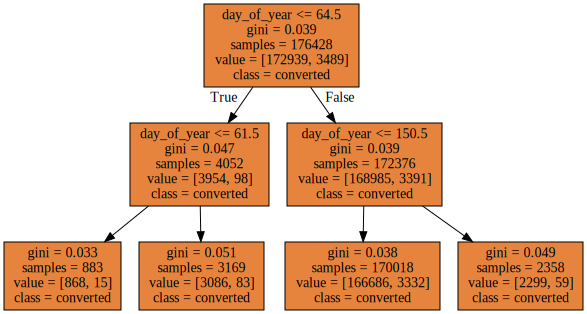

In [184]:
features = ['day_of_year']

target = ['converted']
X_control = non_tested[features].astype(int)
y_control = non_tested[target]
dtree_4 = DecisionTreeClassifier(max_depth=2)
dtree_4.fit(X_control.values,y_control.values)

graph = Source(export_graphviz(dtree_4, out_file=None, feature_names=list(X_test.columns), class_names=target, filled = True))
display(SVG(graph.pipe(format='svg')))


In [188]:
import datetime
d1 = datetime.datetime(2015, 1, 1) + datetime.timedelta(145.5 - 1)
print(datetime.datetime(2015, d1.month, d1.day).strftime('%Y-%b-%d'))
d2 = datetime.datetime(2015, 1, 1) + datetime.timedelta(150.5 - 1)
print(datetime.datetime(2015, d2.month, d2.day).strftime('%Y-%b-%d'))

2015-May-25
2015-May-30


After around day 25-30-May 2015, the conversion rate of non_tested group is 2.5%, while for tested group is 1.8%

As shown in the line chart above, we can see that the difference between conversion rate is getting smaller after around date 25-May-2015.

Hence, there's no need to test users for longer time